In [19]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [53]:
m = 100
x = 6 * np.random.rand(m, 1) -3
y = .5 * x**2 + x + 2 + np.random.randn(m, 1) *.8

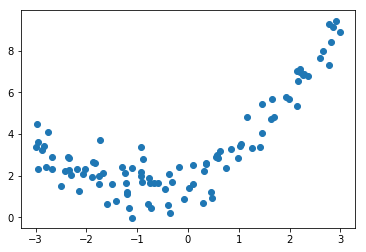

In [55]:
plt.scatter(x, y)

In [139]:
#  2 degree = [x, x**2, 1]
x_n = np.c_[x, x**2, np.ones(x.shape[0])]
#  8 degree = [x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, 1]
x_n_eight = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, np.ones(x.shape[0])]

print(x_n[0])

[-0.78039206  0.60901177  1.        ]


In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=8, include_bias=False)
X_poly = poly_features.fit_transform(x)
print(X_poly[0])
print(X_poly[0,0]**4)

[-0.78039206  0.60901177 -0.47526795  0.37089533 -0.28944377  0.22587962
 -0.17627466  0.13756335]
0.370895332509


In [144]:
theta_b = np.linalg.inv(x_n_eight.T @ x_n_eight) @ x_n_eight.T @ y
theta_b

array([[  8.60162688e-01],
       [  9.81376240e-01],
       [  1.48690072e-02],
       [ -1.51222466e-01],
       [  6.06410810e-03],
       [  1.64776067e-02],
       [ -7.50202996e-04],
       [ -5.70655149e-04],
       [  1.60769646e+00]])

In [141]:
theta = np.random.rand(3, 1)

eta = .1
n_epoch = 100
batch_size = 1
m = len(x_n)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

steps = 0
ep = 0
for epoch in range(n_epoch):
    for n in range(m):
        rand = np.random.randint(0,99)
        xi, yi = x_n[rand:rand+batch_size], y[rand:rand+batch_size]
        diff = xi.T @ ((xi @ theta) - yi)
        eta = learning_schedule(epoch * m + n)
        theta = theta - (diff * eta)
        steps +=1
    
print(f'steps: {steps}\n')

print(f'theta: {theta}')

steps: 10000

theta: [[ 0.97104475]
 [ 0.50348145]
 [ 1.87910408]]


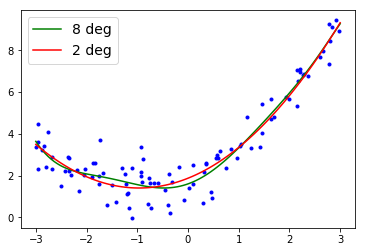

In [148]:
plt.plot(x, y, 'b.')
t = np.linspace(-3, 3, 100).reshape(100, 1)

# Need to add intercespt point

plt.plot(t, np.c_[t, t**2, t**3, t**4, t**5, t**6, t**7, t**8, np.ones(t.shape[0])] @ theta_b, 'g-', label='8 deg')
plt.plot(t, np.c_[t, t**2, np.ones(t.shape[0])] @ theta, 'r-', label='2 deg')
plt.legend(loc="upper left", fontsize=14)
plt.show()

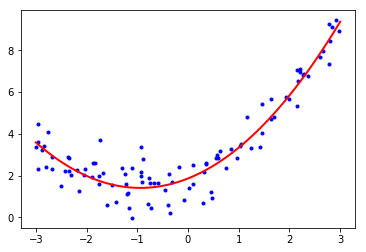

In [62]:

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()